In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


In [2]:
fashion_mnist = pd.read_csv('fashion-mnist_train.csv')

fashion_mnist.head()

#Fashion MNIST images are more complicated than MNIST images
#These images are present as pixels values in the CSV file that 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
fashion_mnist.shape

(60000, 785)

In [4]:
#Its hard to train with 60k record takes several hours so lets train with few sample data - 30% of the data

fashion_mnist_df = fashion_mnist.sample(frac = 0.3).reset_index(drop=True)

fashion_mnist_df.shape

(18000, 785)

In [19]:
LOOKUP = {0 : 'T-Shirt',
          1 : 'Trouser',
          2 : 'Pullover',
          3 : 'Dress',
          4 : 'Coat',
          5 : 'Sandal',
          6 : 'Shirt',
          7 : 'Sneaker',
          8 : 'Bag',
          9 : 'Ankle Boot'}

In [15]:
def display_image(features, actual_label):
    
    print('Actual Label : ', LOOKUP[actual_label])
    
    plt.imshow(features.reshape(28, 28))

In [7]:
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]

Y = fashion_mnist_df['label']

In [10]:
X.head(6)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,3,0,0,2,0,0,0,0,...,224,222,228,255,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,16,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,90,150,42,0,0,0,0


In [11]:
X.loc[5].values[:100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
       108, 133, 139,  14,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   2,   1,
         0, 121, 207, 194, 221, 121,   0,   2,   2,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
         0,   0,   0, 181, 206, 197, 189, 182,   8,   0,   0,   0,   3,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  76, 126, 179, 197, 198, 194, 178])

In [12]:
Y.loc[5]

2

Actual Label :  Bag


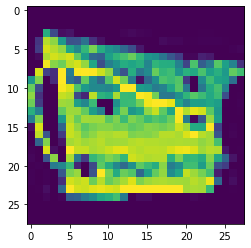

In [25]:
display_image(X.loc[10020].values, Y.loc[10020])

In [26]:
#The intensity values in the original dataset are integers between 0 to 255
# Divide the values by 255 so the intensity will be converted into 0 to 1

X = X/255.

X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.011765,0.0,0.0,0.007843,0.0,0.0,0.0,0.000000,...,0.878431,0.870588,0.894118,1.0,0.0,0.0,0.007843,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.007843,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.062745,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [35]:
def summarize_classification(y_test, y_pred, avg_method = 'weighted'):
    acc = accuracy_score(y_test, y_pred, normalize = True) #normalize=True - accuracy in terms of fraction
    num_acc = accuracy_score(y_test, y_pred, normalize = False)#normalize=False - no of accurately predicted label 
    
    
    #For multiclass classification return a weighted average score of precision and recall for each label
    prec = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    
    print('Test Data count : ', len(y_test))
    print('Accuracy count : ', num_acc)
    print('Accuracy Score : ', acc)
    print('Precision Score : ', prec)
    print('Recall Score : ', recall)
    print()

In [32]:
logistic_model =LogisticRegression(solver = 'sag', multi_class = 'auto', 
                                  max_iter = 10000).fit(x_train, y_train)

#Solver = 'sag' preferred optimization algorithm to use when we work with multi class classifier
#multi_class = auto LR will select right kind of problem to fit whether we perform binary or multi class classificatino

In [33]:
y_pred = logistic_model.predict(x_test)
y_pred

array([4, 4, 2, ..., 3, 5, 7])

In [36]:
summarize_classification(y_test, y_pred)

Test Data count :  3600
Accuracy count :  2993
Accuracy Score :  0.8313888888888888
Precision Score :  0.8301969135407731
Recall Score :  0.8313888888888888

